# Mahmoud Abdelnasser

## Task 3

## Simple Linear Regression

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

In [2]:
df = pd.read_csv('Salary_dataset.csv')
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [3]:
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [4]:
X = df["YearsExperience"].values
X = X.reshape(-1,1)

In [5]:
Y = df["Salary"].values
Y = Y.reshape(-1,1)

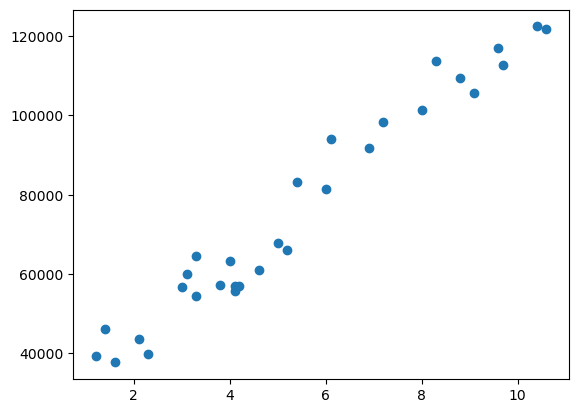

In [6]:
plt.scatter(X,Y)
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [8]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [9]:
pred=reg.predict(x_test)
pred

array([[ 40749.96184072],
       [122700.62295594],
       [ 64962.65717022],
       [ 63100.14214487],
       [115250.56285456],
       [107800.50275317]])

In [10]:
from sklearn import metrics
acc=metrics.r2_score(pred,y_test)
acc

0.986482673117654

In [11]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test,pred)
MAE

2446.17236904651

In [12]:
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(y_test,pred)
MSE

12823412.298126565

In [13]:
np.sqrt(metrics.mean_squared_error(pred,y_test))

3580.9792373213454

In [14]:
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=5, random_state=1, shuffle=True)
scores = cross_val_score(reg, X, Y, scoring='neg_mean_absolute_error', cv=kf, n_jobs=-1)
print('Mean Absolute Error:', np.mean(np.abs(scores)))

Mean Absolute Error: 5442.24981093094


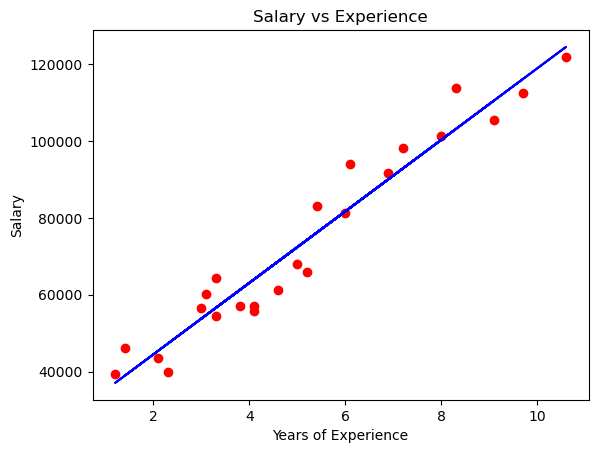

In [15]:
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, reg.predict(x_train), color = 'blue')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Polynomial Linear Regression

In [16]:
df1 = pd.read_csv('rank_salary.csv')
df1.head()

,Position,Level,Salary
0,Teaching Assistants,1,45000
1,Guest Faculty,2,50000
2,Contractual Faculty,3,60000
3,Assistant Professor,4,80000
4,Associate Professor,5,110000


In [17]:
df1= df1.drop(['Position'],axis=1)
df1.head()

,Level,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000


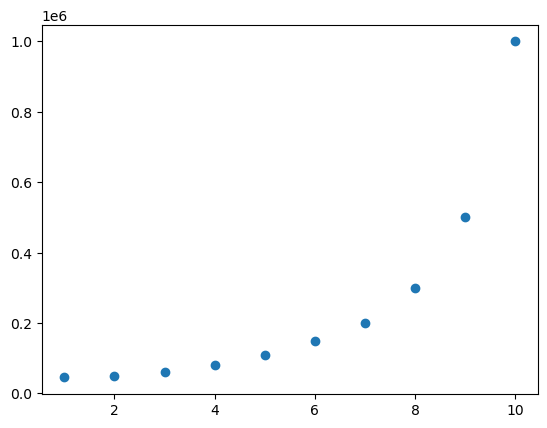

In [18]:
import matplotlib.pyplot as plt

plt.scatter(df1['Level'],df1['Salary'])
plt.show()

In [19]:
x=df1[["Level"]].values
x=x.reshape(-1,1)

In [20]:
y=df1[["Salary"]].values
y=y.reshape(-1,1)

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=6)

In [22]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [23]:
pred=reg.predict(x_test)
pred

array([[550732.75862069],
       [-64482.75862069]])

In [24]:
from sklearn import metrics
acc=metrics.r2_score(pred,y_test)
acc

0.9171438647095279

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
MAE = mean_absolute_error(y_test,pred)
MAE

82607.75862068956

In [26]:
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(y_test,pred)
MSE

7840057409.334107

In [27]:
RMSE=np.sqrt(metrics.mean_squared_error(pred,y_test))
RMSE

88544.09867029032

In [28]:
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=5, random_state=1, shuffle=True)
scores = cross_val_score(reg, x, y, scoring='neg_mean_absolute_error', cv=kf, n_jobs=-1)
print('Mean Absolute Error:', np.mean(np.abs(scores)))

Mean Absolute Error: 172305.05538634062


In [29]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(x)
X_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [30]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly,y)

LinearRegression()

C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_24024\3776815897.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(x),max(x),0.1)


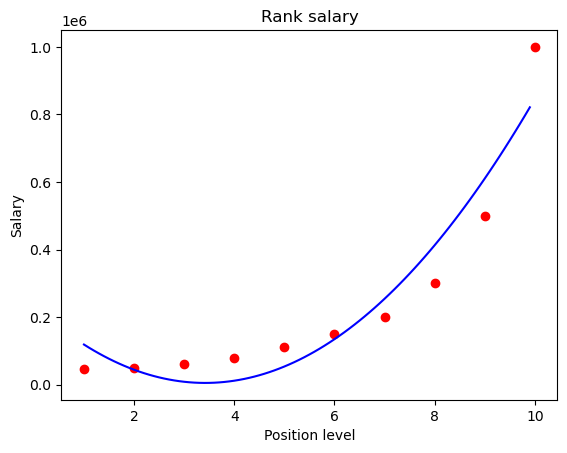

In [31]:
X_grid = np.arange(min(x),max(x),0.1)
X_grid = X_grid.reshape(len(X_grid),1) 
plt.scatter(x,y, color='red') 
 
plt.plot(X_grid, lin_reg2.predict(poly_reg.fit_transform(X_grid)),color='blue') 
 
plt.title("Rank salary")
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Multiple Linear Regression

In [32]:
df2 = pd.read_csv('multiple_linear_regression_dataset.csv')
df2.head()

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


In [33]:
X = df2[['age','experience']]
Y = df2['income']

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [36]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [37]:
y_pred = model.predict(x_test)
y_pred

array([[ 70675.67567568],
       [408851.35135135]])

In [38]:
from sklearn import metrics
acc=metrics.r2_score(y_pred,y_test)
acc

-5.11336435791981

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
MAE = mean_absolute_error(y_test,y_pred)
MAE

300912.16216216225

In [40]:
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(y_test,y_pred)
MSE

174785347425.1279

In [41]:
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=5, random_state=1, shuffle=True)

In [42]:
scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error', cv=kf, n_jobs=-1)
print('Mean Absolute Error:', np.mean(np.abs(scores)))

Mean Absolute Error: 172305.05538634062
